In [ ]:
import pandas           #Экспериментирование с matplotlib
import numpy as np 
import matplotlib.pyplot as plt
data = pandas.read_csv('C:/Users/arami/Documents/svm-data.csv', header=None)
X = data.iloc[:,1:]
y = data.iloc[:,0]
a, ax = plt.subplots()
ax.scatter(y=y, x=X[2], marker='o', c='r', edgecolor='b')

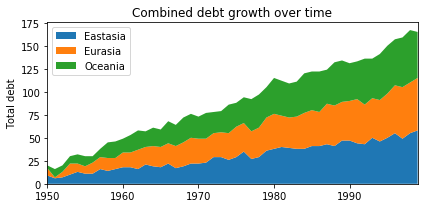

In [7]:
rng = np.arange(50)
rnd = np.random.randint(0, 10, size=(3, rng.size))
yrs = 1950 + rng
 
fig, ax = plt.subplots(figsize=(6, 3))
ax.stackplot(yrs, rng + rnd, labels=['Eastasia', 'Eurasia', 'Oceania'])
ax.set_title('Combined debt growth over time')
ax.legend(loc='upper left')
ax.set_ylabel('Total debt')
ax.set_xlim(xmin=yrs[0], xmax=yrs[-1])
fig.tight_layout()#чистит пробелы
 
plt.show()

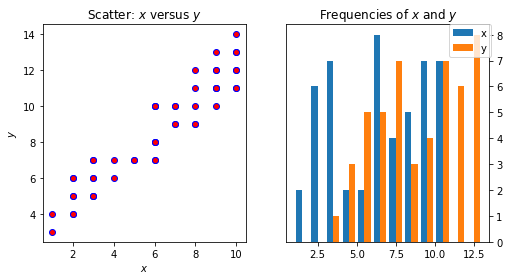

In [6]:
x = np.random.randint(low=1, high=11, size=50)
y = x + np.random.randint(1, 5, size=x.size)
data = np.column_stack((x, y))
 
fig, (ax1, ax2) = plt.subplots(
    nrows=1, ncols=2,
    figsize=(8, 4)
)
 
ax1.scatter(x=x, y=y, marker='o', c='r', edgecolor='b')
ax1.set_title('Scatter: $x$ versus $y$')# $ - курсив
ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')
 
ax2.hist(
    data, bins=np.arange(data.min(), data.max()),
    label=('x', 'y')
)
 
ax2.legend(loc=(0.8, 0.85))
ax2.set_title('Frequencies of $x$ and $y$')
ax2.yaxis.tick_right()
 
plt.show()

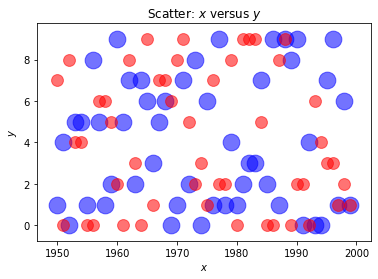

In [28]:
rng = np.arange(50)
rnd = np.random.randint(0, 10, size=(1, rng.size))
rnd2 = np.random.randint(0, 10, size=(1, rng.size))
yrs = 1950 + rng

fig, ax1 = plt.subplots()
ax1.scatter(x=yrs, y=rnd, s = 280, c='b', alpha = 0.55)#отрисовка синих прозрачных точек
ax1.set_title('Scatter: $x$ versus $y$')
ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')

#fig, ax1 = plt.subplots()
ax1.scatter(x=yrs, y=rnd2, s = 140, c='r', alpha = 0.55)

plt.show()

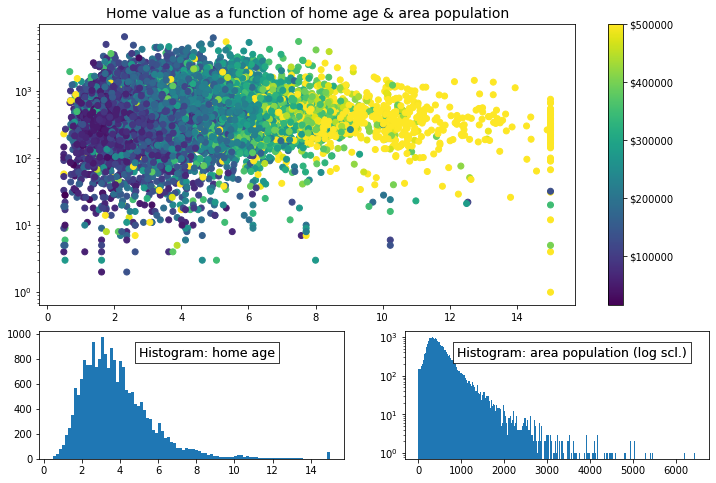

In [5]:
from io import BytesIO
import tarfile
from urllib.request import urlopen
import matplotlib.pyplot as plt
import pandas
import numpy as np 
 
url = 'http://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.tgz'
b = BytesIO(urlopen(url).read())
fpath = 'CaliforniaHousing/cal_housing.data'
 
with tarfile.open(mode='r', fileobj=b) as archive:
    housing = np.loadtxt(archive.extractfile(fpath), delimiter=',')
y = housing[:, -1]
pop, age = housing[:, [4, 7]].T

def add_titlebox(ax, text):#создание большого дашборда
    ax.text(.55, .8, text,
        horizontalalignment='center',
        transform=ax.transAxes,
        bbox=dict(facecolor='white', alpha=0.6),
        fontsize=12.5)
    return ax

gridsize = (3, 2)
fig = plt.figure(figsize=(12, 8))
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=2)
ax2 = plt.subplot2grid(gridsize, (2, 0))
ax3 = plt.subplot2grid(gridsize, (2, 1))

ax1.set_title(
    'Home value as a function of home age & area population',
    fontsize=14
)

sctr = ax1.scatter(x=age, y=pop, c=y, cmap='viridis')
plt.colorbar(sctr, ax=ax1, format='$%d')
ax1.set_yscale('log')
ax2.hist(age, bins='auto')
ax3.hist(pop, bins='auto', log=True)

add_titlebox(ax2, 'Histogram: home age')
add_titlebox(ax3, 'Histogram: area population (log scl.)')

#ax1.set_title(    'Home value as a function of home age & area population',    fontsize=14)
 
add_titlebox(ax2, 'Histogram: home age')
add_titlebox(ax3, 'Histogram: area population (log scl.)')
plt.show()